In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('tcdml1920-rec-click-pred--training.csv')
cols_to_drop = ['user_id','session_id']
new_df = df[df.columns.drop(cols_to_drop)]
# print(new_df.head())

new_df = new_df[(new_df['rec_processing_time']<5)]
new_df = new_df.replace('\\N',np.nan)
print(new_df.info())

# all_columns = ['query_word_count','query_char_count',
#                 'hour_request_received','num_pubs_by_first_author','number_of_authors'] # Creates list of all column headers
# new_df[all_columns] = new_df[all_columns].astype('float64')


# new_df = new_df[~new_df['time_recs_viewed'].isnull()]
# print(new_df.info())



<class 'pandas.core.frame.DataFrame'>
Int64Index: 271839 entries, 0 to 385686
Data columns (total 44 columns):
recommendation_set_id               271839 non-null int64
query_identifier                    271685 non-null object
query_word_count                    271685 non-null object
query_char_count                    271685 non-null object
query_detected_language             268284 non-null object
query_document_id                   128476 non-null object
document_language_provided          2557 non-null object
year_published                      43752 non-null object
number_of_authors                   42444 non-null object
abstract_word_count                 115873 non-null object
abstract_char_count                 115873 non-null object
abstract_detected_language          115818 non-null object
first_author_id                     40764 non-null object
num_pubs_by_first_author            40764 non-null object
organization_id                     271839 non-null int64
application_

In [250]:
all_columns = ['query_word_count','query_char_count',
                'hour_request_received','num_pubs_by_first_author','number_of_authors','local_hour_of_request'] # Creates list of all column headers
new_df[all_columns] = new_df[all_columns].astype('float64')

In [251]:
new_df['organization_id'].value_counts()

1    167778
4     89384
8     14677
Name: organization_id, dtype: int64

In [252]:
df1 = new_df[new_df['organization_id']== 1]
# print(df1.describe())
print(df1.isnull().sum())

recommendation_set_id                    0
query_identifier                         0
query_word_count                         0
query_char_count                         0
query_detected_language               3401
query_document_id                   121298
document_language_provided          165221
year_published                      124026
number_of_authors                   125334
abstract_word_count                 133533
abstract_char_count                 133533
abstract_detected_language          133588
first_author_id                     127014
num_pubs_by_first_author            127014
organization_id                          0
application_type                         0
item_type                               39
request_received                         0
hour_request_received                    0
response_delivered                       0
rec_processing_time                      0
app_version                             34
app_lang                               793
user_os    

In [253]:
cols= ['query_word_count','query_char_count','query_detected_language','application_type','item_type','hour_request_received',
      'app_version','app_lang','country_by_ip','algorithm_class','cbf_parser','search_title','search_keywords','search_abstract','local_hour_of_request','clicks',
      'ctr','set_clicked']
df1= df1[cols]
df1.head()

,query_word_count,query_char_count,query_detected_language,application_type,item_type,hour_request_received,app_version,app_lang,country_by_ip,algorithm_class,cbf_parser,search_title,search_keywords,search_abstract,local_hour_of_request,clicks,ctr,set_clicked
0,6.0,35.0,en,digital_library,academic_publication,16.0,4.3.1,en,NL,content_based_filtering,standard_QP,yes,no,no,NaN,0,0.0,0
1,9.0,53.0,en,digital_library,academic_publication,16.0,4.3.1,en,GB,content_based_filtering,standard_QP,yes,no,no,NaN,0,0.0,0
3,14.0,100.0,en,digital_library,academic_publication,16.0,4.3.1,en,US,content_based_filtering,standard_QP,yes,no,no,NaN,0,0.0,0
4,14.0,100.0,en,digital_library,academic_publication,16.0,4.3.1,en,US,content_based_filtering,edismax_QP,yes,yes,no,NaN,0,0.0,0
5,22.0,158.0,de,digital_library,academic_publication,16.0,4.3.1,de,DE,content_based_filtering,standard_QP,yes,no,no,NaN,0,0.0,0


In [254]:

df1['cbf_parser'].isnull().sum()



53247

In [255]:
from sklearn.model_selection import train_test_split
x= df1.iloc[:,:-3]
y = df1.iloc[:,-1]
print(x['app_lang'].value_counts())

# print(x.head())
# print(y.head())

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101, stratify =y)

en       139799
de        17683
zh         4091
pt_BR      1257
fr         1206
es         1175
ja          875
ru          514
it          292
da           27
nl           20
no           16
tr           12
sv            7
fa            5
vi            3
el            3
Name: app_lang, dtype: int64


In [256]:
y_train.value_counts()

0    131361
1      2861
Name: set_clicked, dtype: int64

In [257]:
cols = x_train.columns
x_train[cols]=x_train[cols].fillna(x_train.mode().iloc[0])
x_train.isnull().sum()

query_word_count           0
query_char_count           0
query_detected_language    0
application_type           0
item_type                  0
hour_request_received      0
app_version                0
app_lang                   0
country_by_ip              0
algorithm_class            0
cbf_parser                 0
search_title               0
search_keywords            0
search_abstract            0
local_hour_of_request      0
dtype: int64

In [258]:
cols = x_test.columns
x_test[cols]=x_test[cols].fillna(x_test.mode().iloc[0])
x_test.isnull().sum()

query_word_count           0
query_char_count           0
query_detected_language    0
application_type           0
item_type                  0
hour_request_received      0
app_version                0
app_lang                   0
country_by_ip              0
algorithm_class            0
cbf_parser                 0
search_title               0
search_keywords            0
search_abstract            0
local_hour_of_request      0
dtype: int64

In [259]:
x_train = pd.get_dummies(data=x_train, columns=['query_detected_language','application_type','item_type',
                                       'app_version','app_lang','country_by_ip','algorithm_class','cbf_parser','search_title',
                                       'search_keywords','search_abstract'])
x_test = pd.get_dummies(data=x_test, columns=['query_detected_language','application_type','item_type',
                                       'app_version','app_lang','country_by_ip','algorithm_class','cbf_parser','search_title',
                                       'search_keywords','search_abstract'])

In [260]:
for column in list(x_train.columns.difference(x_test.columns)):
    x_test[column]=0
print("______________________________________________")
for column in list(x_test.columns.difference(x_train.columns)):
    x_train[column]=0
x_test= x_test[x_train.columns]
# x_test= x_test.loc[x_train.columns]

# x_train = x_train.reindex(columns=x_train.columns | x_test.columns)
# x_test = x_test.reindex(columns=x_test.columns | x_train.columns)
# x_test.isnull().sum()
# x_test["app_lang_vi"].unique()
# x_train.assign(**dict.fromkeys(x_train.columns.difference(x_test.columns), 0))
# x_test.assign(**dict.fromkeys(x_test.columns.difference(x_train.columns), 0))
# x_train["app_lang_vi"].value_counts()

______________________________________________


In [265]:
from sklearn.ensemble import RandomForestClassifier

# # train model
rfc = RandomForestClassifier(n_estimators=100).fit(x_train, y_train)

# predict on test set
rfc_pred = rfc.predict(x_test)
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
print(accuracy_score(y_test, rfc_pred))

print(f1_score(y_test, rfc_pred))

print(recall_score(y_test, rfc_pred))

print(precision_score(y_test, rfc_pred))

0.9766360710454166
0.012594458438287154
0.006993006993006993
0.06329113924050633


In [24]:
pred_proba_df = pd.DataFrame(rfc.predict_proba(x_test))
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = accuracy_score(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                                           Y_test_pred.iloc[:,1].as_matrix().reshape(Y_test_pred.iloc[:,1].as_matrix().size,1))
    print('Our testing accuracy is {}'.format(test_accuracy))

    print(confusion_matrix(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                           Y_test_pred.iloc[:,1].as_matrix().reshape(Y_test_pred.iloc[:,1].as_matrix().size,1)))


******** For i = 0.05 ******
Our testing accuracy is 0.8935985198889916
[[48141  4800]
 [  951   158]]

******** For i = 0.1 ******
Our testing accuracy is 0.9353376503237743
[[50454  2487]
 [ 1008   101]]

******** For i = 0.15 ******
Our testing accuracy is 0.9527104532839963
[[51425  1516]
 [ 1040    69]]

******** For i = 0.2 ******
Our testing accuracy is 0.9612025901942646
[[51903  1038]
 [ 1059    50]]

******** For i = 0.25 ******
Our testing accuracy is 0.9666234967622571
[[52207   734]
 [ 1070    39]]

******** For i = 0.3 ******
Our testing accuracy is 0.9698982423681776
[[52391   550]
 [ 1077    32]]

******** For i = 0.35 ******
Our testing accuracy is 0.9724514338575393
[[52534   407]
 [ 1082    27]]

******** For i = 0.4 ******
Our testing accuracy is 0.9742830712303423
[[52637   304]
 [ 1086    23]]

******** For i = 0.45 ******
Our testing accuracy is 0.976059204440333
[[52741   200]
 [ 1094    15]]

******** For i = 0.5 ******
Our testing accuracy is 0.97722479185938

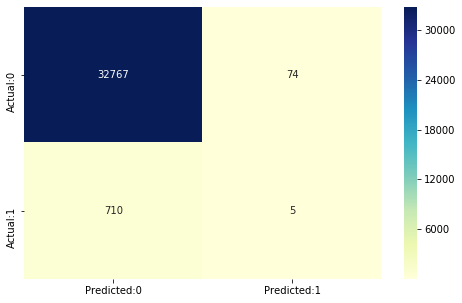

In [266]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,rfc_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [261]:
test = pd.read_csv('tcdml1920-rec-click-pred--test.csv')
test = test.iloc[:9145,:]

cols_to_drop = ['user_id','session_id','clicks','ctr','set_clicked']
test = test[test.columns.drop(cols_to_drop)]
# print(test.head())
test = test.replace('\\N',np.nan)
# print(test.head())
# all_columns = ['query_word_count','query_char_count',
#                 'hour_request_received','num_pubs_by_first_author','number_of_authors'] # Creates list of all column headers
# test[all_columns] = test[all_columns].astype('float64')

all_columns = ['query_word_count','query_char_count',
                'hour_request_received','num_pubs_by_first_author','number_of_authors','local_hour_of_request'] # Creates list of all column headers
test[all_columns] = test[all_columns].astype('float64')

test_df1 = test[test['organization_id']== 1]
test_df2 = test[test['organization_id']== 4]
test_df3 = test[test['organization_id']== 8]

print(test_df1.head())


   recommendation_set_id      query_identifier  query_word_count  \
0                46914.0  Withheld for privacy              18.0   
1                46961.0  Withheld for privacy               5.0   
2                47012.0  Withheld for privacy               8.0   
3                47181.0  Withheld for privacy               9.0   
4                47240.0  Withheld for privacy              10.0   

   query_char_count query_detected_language query_document_id  \
0             126.0                      en               NaN   
1              60.0                      en               NaN   
2              54.0                      en               NaN   
3              59.0                      en          11559885   
4              81.0                      en               NaN   

  document_language_provided year_published  number_of_authors  \
0                        NaN            NaN                NaN   
1                        NaN            NaN                NaN   
2 

In [262]:
cols= ['query_word_count','query_char_count','query_detected_language','application_type','item_type','hour_request_received',
      'app_version','app_lang','country_by_ip','algorithm_class','cbf_parser','search_title','search_keywords','search_abstract','local_hour_of_request']
test_df1= test_df1[cols]
cols = test_df1.columns
test_df1[cols]=test_df1[cols].fillna(test_df1.mode().iloc[0])
test_df1.isnull().sum()

query_word_count           0
query_char_count           0
query_detected_language    0
application_type           0
item_type                  0
hour_request_received      0
app_version                0
app_lang                   0
country_by_ip              0
algorithm_class            0
cbf_parser                 0
search_title               0
search_keywords            0
search_abstract            0
local_hour_of_request      0
dtype: int64

In [263]:
test_df1 = pd.get_dummies(data=test_df1, columns=['query_detected_language','application_type','item_type',
                                       'app_version','app_lang','country_by_ip','algorithm_class','cbf_parser','search_title',
                                       'search_keywords','search_abstract'])


In [264]:
for column in list(x_train.columns.difference(test_df1.columns)):
    test_df1[column]=0
for column in list(test_df1.columns.difference(x_train.columns)):
    x_train[column]=0

test_df1= test_df1[x_train.columns]

In [267]:
threshold = 0.5

predicted_proba = rfc.predict_proba(test_df1)
answer_pred = (predicted_proba [:,1] >= threshold).astype('int')
# answer_pred = rfc.predict(test_df1)
answer_pred = pd.DataFrame(answer_pred,
            columns=['set_clicked'])
print(answer_pred['set_clicked'].value_counts())

0    5148
1      28
Name: set_clicked, dtype: int64


In [247]:
dd = test[test['organization_id']== 1][['recommendation_set_id']].reset_index(drop=True)
# print(dd)
result1 = pd.concat([dd, answer_pred], axis=1)
print(result1['set_clicked'].value_counts())

0    5136
1      40
Name: set_clicked, dtype: int64


In [195]:
df = pd.read_csv('tcdml1920-rec-click-pred--training.csv')
cols_to_drop = ['user_id','session_id']
new_df = df[df.columns.drop(cols_to_drop)]
# print(new_df.head())

# new_df = new_df[(new_df['rec_processing_time']<38)]
new_df = new_df.replace('\\N',np.nan)
new_df = new_df[~new_df['time_recs_viewed'].isnull()]

all_columns = ['query_word_count','query_char_count',
                'hour_request_received','num_pubs_by_first_author','number_of_authors','local_hour_of_request'] # Creates list of all column headers
new_df[all_columns] = new_df[all_columns].astype('float64')

df2 = new_df[new_df['organization_id']== 4]

# print(df2.describe())
print(df2.isnull().sum())

recommendation_set_id                  0
query_identifier                       3
query_word_count                       3
query_char_count                       3
query_detected_language                3
query_document_id                    199
document_language_provided          8731
year_published                      8731
number_of_authors                   8731
abstract_word_count                  231
abstract_char_count                  231
abstract_detected_language           231
first_author_id                     8731
num_pubs_by_first_author            8731
organization_id                        0
application_type                       0
item_type                           1908
request_received                       0
hour_request_received                  0
response_delivered                     0
rec_processing_time                    0
app_version                         8731
app_lang                              26
user_os                             8731
user_os_version 

In [196]:
cols= ['query_word_count','query_char_count','query_detected_language','application_type','item_type','hour_request_received','app_lang','country_by_ip','algorithm_class','cbf_parser','search_title','search_keywords','search_abstract','local_hour_of_request','clicks',
      'ctr','set_clicked']
df2= df2[cols]
df2.head()
print(df2.isnull().sum())

query_word_count              3
query_char_count              3
query_detected_language       3
application_type              0
item_type                  1908
hour_request_received         0
app_lang                     26
country_by_ip                42
algorithm_class               0
cbf_parser                 3342
search_title                  0
search_keywords               0
search_abstract               0
local_hour_of_request       603
clicks                        0
ctr                           0
set_clicked                   0
dtype: int64


In [197]:
from sklearn.model_selection import train_test_split
x= df2.iloc[:,:-3]
y = df2.iloc[:,-1]
print(x['app_lang'].value_counts())

# print(x.head())
# print(y.head())

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101, stratify =y)

en    8705
Name: app_lang, dtype: int64


In [198]:
cols = x_train.columns
x_train[cols]=x_train[cols].fillna(x_train.mode().iloc[0])
x_train.isnull().sum()

query_word_count           0
query_char_count           0
query_detected_language    0
application_type           0
item_type                  0
hour_request_received      0
app_lang                   0
country_by_ip              0
algorithm_class            0
cbf_parser                 0
search_title               0
search_keywords            0
search_abstract            0
local_hour_of_request      0
dtype: int64

In [199]:
cols = x_test.columns
x_test[cols]=x_test[cols].fillna(x_test.mode().iloc[0])
x_test.isnull().sum()

query_word_count           0
query_char_count           0
query_detected_language    0
application_type           0
item_type                  0
hour_request_received      0
app_lang                   0
country_by_ip              0
algorithm_class            0
cbf_parser                 0
search_title               0
search_keywords            0
search_abstract            0
local_hour_of_request      0
dtype: int64

In [200]:
x_train = pd.get_dummies(data=x_train, columns=['query_detected_language','application_type','item_type'
                                    ,'app_lang','country_by_ip','algorithm_class','cbf_parser','search_title',
                                       'search_keywords','search_abstract'])
x_test = pd.get_dummies(data=x_test, columns=['query_detected_language','application_type','item_type'
                                      ,'app_lang','country_by_ip','algorithm_class','cbf_parser','search_title',
                                       'search_keywords','search_abstract'])

In [205]:
for column in list(x_train.columns.difference(x_test.columns)):
    x_test[column]=0
print("______________________________________________")
for column in list(x_test.columns.difference(x_train.columns)):
    x_train[column]=0
x_test= x_test[x_train.columns]

______________________________________________


In [206]:
from sklearn.ensemble import RandomForestClassifier

# # train model
rfc = RandomForestClassifier(n_estimators=100).fit(x_train, y_train)

# predict on test set
rfc_pred = rfc.predict(x_test)
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
print(accuracy_score(y_test, rfc_pred))

print(f1_score(y_test, rfc_pred))

print(recall_score(y_test, rfc_pred))

print(precision_score(y_test, rfc_pred))

0.936462507155123
0.03478260869565218
0.019230769230769232
0.18181818181818182


In [43]:
pred_proba_df = pd.DataFrame(rfc.predict_proba(x_test))
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = accuracy_score(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                                           Y_test_pred.iloc[:,1].as_matrix().reshape(Y_test_pred.iloc[:,1].as_matrix().size,1))
    print('Our testing accuracy is {}'.format(test_accuracy))

    print(confusion_matrix(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                           Y_test_pred.iloc[:,1].as_matrix().reshape(Y_test_pred.iloc[:,1].as_matrix().size,1)))


******** For i = 0.05 ******
Our testing accuracy is 0.6611333714939897
[[1112  531]
 [  61   43]]

******** For i = 0.1 ******
Our testing accuracy is 0.8025186033199772
[[1373  270]
 [  75   29]]

******** For i = 0.15 ******
Our testing accuracy is 0.859187178019462
[[1482  161]
 [  85   19]]

******** For i = 0.2 ******
Our testing accuracy is 0.8923869490555237
[[1546   97]
 [  91   13]]

******** For i = 0.25 ******
Our testing accuracy is 0.9101316542644533
[[1581   62]
 [  95    9]]

******** For i = 0.3 ******
Our testing accuracy is 0.9215798511734402
[[1604   39]
 [  98    6]]

******** For i = 0.35 ******
Our testing accuracy is 0.9250143102461362
[[1611   32]
 [  99    5]]

******** For i = 0.4 ******
Our testing accuracy is 0.9284487693188322
[[1620   23]
 [ 102    2]]

******** For i = 0.45 ******
Our testing accuracy is 0.933028048082427
[[1629   14]
 [ 103    1]]

******** For i = 0.5 ******
Our testing accuracy is 0.936462507155123
[[1635    8]
 [ 103    1]]

*******

In [187]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,rfc_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

ValueError: Found input variables with inconsistent numbers of samples: [1747, 54001]

In [83]:
test_df2.columns

Index(['recommendation_set_id', 'query_identifier', 'query_word_count',
       'query_char_count', 'query_detected_language', 'query_document_id',
       'document_language_provided', 'year_published', 'number_of_authors',
       'abstract_word_count', 'abstract_char_count',
       'abstract_detected_language', 'first_author_id',
       'num_pubs_by_first_author', 'organization_id', 'application_type',
       'item_type', 'request_received', 'hour_request_received',
       'response_delivered', 'rec_processing_time', 'app_version', 'app_lang',
       'user_os', 'user_os_version', 'user_java_version', 'user_timezone',
       'country_by_ip', 'timezone_by_ip', 'local_time_of_request',
       'local_hour_of_request', 'number_of_recs_in_set',
       'recommendation_algorithm_id_used', 'algorithm_class', 'cbf_parser',
       'search_title', 'search_keywords', 'search_abstract',
       'time_recs_recieved', 'time_recs_displayed', 'time_recs_viewed'],
      dtype='object')

In [202]:
cols= ['query_word_count','query_char_count','query_detected_language','application_type','item_type','hour_request_received',
      'app_lang','country_by_ip','algorithm_class','cbf_parser','search_title','search_keywords','search_abstract','local_hour_of_request']
test_df2 = test_df2[cols]
cols = test_df2.columns
test_df2[cols]=test_df2[cols].fillna(test_df2.mode().iloc[0])
test_df2.isnull().sum()

query_word_count           0
query_char_count           0
query_detected_language    0
application_type           0
item_type                  0
hour_request_received      0
app_lang                   0
country_by_ip              0
algorithm_class            0
cbf_parser                 0
search_title               0
search_keywords            0
search_abstract            0
local_hour_of_request      0
dtype: int64

In [203]:
test_df2 = pd.get_dummies(data=test_df2, columns=['query_detected_language','application_type','item_type',
                                       'app_lang','country_by_ip','algorithm_class','cbf_parser','search_title',
                                       'search_keywords','search_abstract'])


In [204]:
for column in list(x_train.columns.difference(test_df2.columns)):
    test_df2[column]=0
for column in list(test_df2.columns.difference(x_train.columns)):
    x_train[column]=0

test_df2= test_df2[x_train.columns]

In [207]:
threshold = 0.5

predicted_proba = rfc.predict_proba(test_df2)
answer_pred2 = (predicted_proba [:,1] >= threshold).astype('int')
# answer_pred = rfc.predict(test_df1)
answer_pred2 = pd.DataFrame(answer_pred2,
            columns=['set_clicked'])
print(answer_pred2['set_clicked'].value_counts())

0    3013
1      16
Name: set_clicked, dtype: int64


In [208]:
dd = test[test['organization_id']== 4][['recommendation_set_id']].reset_index(drop=True)
# print(dd)
result2 = pd.concat([dd, answer_pred2], axis=1)
print(result2['set_clicked'].value_counts())

0    3013
1      16
Name: set_clicked, dtype: int64


In [209]:
df3 = new_df[new_df['organization_id']== 8]
# print(df1.describe())
print(df3.isnull().sum())

recommendation_set_id                  0
query_identifier                       3
query_word_count                       3
query_char_count                       3
query_detected_language                3
query_document_id                     45
document_language_provided          4344
year_published                      4344
number_of_authors                   4344
abstract_word_count                  121
abstract_char_count                  121
abstract_detected_language           121
first_author_id                     4344
num_pubs_by_first_author            4344
organization_id                        0
application_type                       0
item_type                             45
request_received                       0
hour_request_received                  0
response_delivered                     0
rec_processing_time                    0
app_version                         4344
app_lang                            4344
user_os                             4344
user_os_version 

In [210]:
df = pd.read_csv('tcdml1920-rec-click-pred--training.csv')
cols_to_drop = ['user_id','session_id']
new_df = df[df.columns.drop(cols_to_drop)]
# print(new_df.head())

# new_df = new_df[(new_df['rec_processing_time']<38)]
new_df = new_df.replace('\\N',np.nan)
new_df = new_df[~new_df['time_recs_viewed'].isnull()]

all_columns = ['query_word_count','query_char_count',
                'hour_request_received','num_pubs_by_first_author','number_of_authors','local_hour_of_request'] # Creates list of all column headers
new_df[all_columns] = new_df[all_columns].astype('float64')

df3 = new_df[new_df['organization_id']== 8]

# print(df2.describe())
print(df3.isnull().sum())

recommendation_set_id                  0
query_identifier                       3
query_word_count                       3
query_char_count                       3
query_detected_language                3
query_document_id                     45
document_language_provided          4344
year_published                      4344
number_of_authors                   4344
abstract_word_count                  121
abstract_char_count                  121
abstract_detected_language           121
first_author_id                     4344
num_pubs_by_first_author            4344
organization_id                        0
application_type                       0
item_type                             45
request_received                       0
hour_request_received                  0
response_delivered                     0
rec_processing_time                    0
app_version                         4344
app_lang                            4344
user_os                             4344
user_os_version 

In [212]:
cols= ['query_word_count','query_char_count','query_detected_language','application_type','item_type','hour_request_received','country_by_ip','algorithm_class','cbf_parser','search_title','search_keywords','search_abstract','local_hour_of_request','clicks',
      'ctr','set_clicked']
df3= df3[cols]
df3.head()
print(df3.isnull().sum())

query_word_count              3
query_char_count              3
query_detected_language       3
application_type              0
item_type                    45
hour_request_received         0
country_by_ip                53
algorithm_class               0
cbf_parser                 1346
search_title                  0
search_keywords               0
search_abstract               0
local_hour_of_request       229
clicks                        0
ctr                           0
set_clicked                   0
dtype: int64


In [213]:
from sklearn.model_selection import train_test_split
x= df3.iloc[:,:-3]
y = df3.iloc[:,-1]

# print(x.head())
# print(y.head())

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101, stratify =y)

In [214]:
cols = x_train.columns
x_train[cols]=x_train[cols].fillna(x_train.mode().iloc[0])
x_train.isnull().sum()

cols = x_test.columns
x_test[cols]=x_test[cols].fillna(x_test.mode().iloc[0])
x_test.isnull().sum()

query_word_count           0
query_char_count           0
query_detected_language    0
application_type           0
item_type                  0
hour_request_received      0
country_by_ip              0
algorithm_class            0
cbf_parser                 0
search_title               0
search_keywords            0
search_abstract            0
local_hour_of_request      0
dtype: int64

In [215]:
x_train = pd.get_dummies(data=x_train, columns=['query_detected_language','application_type','item_type'
                                   ,'country_by_ip','algorithm_class','cbf_parser','search_title',
                                       'search_keywords','search_abstract'])
x_test = pd.get_dummies(data=x_test, columns=['query_detected_language','application_type','item_type'
                                      ,'country_by_ip','algorithm_class','cbf_parser','search_title',
                                       'search_keywords','search_abstract'])

In [220]:
for column in list(x_train.columns.difference(x_test.columns)):
    x_test[column]=0
print("______________________________________________")
for column in list(x_test.columns.difference(x_train.columns)):
    x_train[column]=0
x_test= x_test[x_train.columns]

______________________________________________


In [221]:
from sklearn.ensemble import RandomForestClassifier

# # train model
rfc = RandomForestClassifier(n_estimators=100).fit(x_train, y_train)

# predict on test set
rfc_pred = rfc.predict(x_test)
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
print(accuracy_score(y_test, rfc_pred))

print(f1_score(y_test, rfc_pred))

print(recall_score(y_test, rfc_pred))

print(precision_score(y_test, rfc_pred))

0.9781357882623706
0.0
0.0
0.0


In [101]:
pred_proba_df = pd.DataFrame(rfc.predict_proba(x_test))
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = accuracy_score(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                                           Y_test_pred.iloc[:,1].as_matrix().reshape(Y_test_pred.iloc[:,1].as_matrix().size,1))
    print('Our testing accuracy is {}'.format(test_accuracy))

    print(confusion_matrix(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                           Y_test_pred.iloc[:,1].as_matrix().reshape(Y_test_pred.iloc[:,1].as_matrix().size,1)))


******** For i = 0.05 ******
Our testing accuracy is 0.8837744533947065
[[764  87]
 [ 14   4]]

******** For i = 0.1 ******
Our testing accuracy is 0.9355581127733027
[[810  41]
 [ 15   3]]

******** For i = 0.15 ******
Our testing accuracy is 0.9585730724971231
[[830  21]
 [ 15   3]]

******** For i = 0.2 ******
Our testing accuracy is 0.9643268124280783
[[836  15]
 [ 16   2]]

******** For i = 0.25 ******
Our testing accuracy is 0.9700805523590333
[[841  10]
 [ 16   2]]

******** For i = 0.3 ******
Our testing accuracy is 0.9735327963176065
[[845   6]
 [ 17   1]]

******** For i = 0.35 ******
Our testing accuracy is 0.9746835443037974
[[847   4]
 [ 18   0]]

******** For i = 0.4 ******
Our testing accuracy is 0.9746835443037974
[[847   4]
 [ 18   0]]

******** For i = 0.45 ******
Our testing accuracy is 0.9781357882623706
[[850   1]
 [ 18   0]]

******** For i = 0.5 ******
Our testing accuracy is 0.9792865362485615
[[851   0]
 [ 18   0]]

******** For i = 0.55 ******
Our testing acc

In [217]:
cols= ['query_word_count','query_char_count','query_detected_language','application_type','item_type','hour_request_received'
      ,'country_by_ip','algorithm_class','cbf_parser','search_title','search_keywords','search_abstract','local_hour_of_request']

test_df3 = test_df3[cols]
cols = test_df3.columns
test_df3[cols]=test_df3[cols].fillna(test_df3.mode().iloc[0])
test_df3.isnull().sum()

query_word_count           0
query_char_count           0
query_detected_language    0
application_type           0
item_type                  0
hour_request_received      0
country_by_ip              0
algorithm_class            0
cbf_parser                 0
search_title               0
search_keywords            0
search_abstract            0
local_hour_of_request      0
dtype: int64

In [218]:
test_df3 = pd.get_dummies(data=test_df3, columns=['query_detected_language','application_type','item_type',
                                       'country_by_ip','algorithm_class','cbf_parser','search_title',
                                       'search_keywords','search_abstract'])


In [219]:
for column in list(x_train.columns.difference(test_df3.columns)):
    test_df3[column]=0
for column in list(test_df3.columns.difference(x_train.columns)):
    x_train[column]=0

test_df3= test_df3[x_train.columns]

In [222]:
threshold = 0.5

predicted_proba = rfc.predict_proba(test_df3)
answer_pred3 = (predicted_proba [:,1] >= threshold).astype('int')
# answer_pred = rfc.predict(test_df1)
answer_pred3 = pd.DataFrame(answer_pred3,
            columns=['set_clicked'])
print(answer_pred3['set_clicked'].value_counts())

0    938
1      2
Name: set_clicked, dtype: int64


In [223]:
dd = test[test['organization_id']== 8][['recommendation_set_id']].reset_index(drop=True)
# print(dd)
result3 = pd.concat([dd, answer_pred3], axis=1)
print(result3['set_clicked'].value_counts())

0    938
1      2
Name: set_clicked, dtype: int64


In [248]:
f= pd.concat([result1,result2,result3])
# print(f)

f['recommendation_set_id'] = f['recommendation_set_id'].astype(int)
print(f.dtypes)
f.sort_values("recommendation_set_id", inplace=True, ascending=False)
f.head()
f.to_csv('new_submission-org_id file3.csv', encoding='utf-8', index=False)
f['set_clicked'].value_counts()

recommendation_set_id    int32
set_clicked              int32
dtype: object


0    9087
1      58
Name: set_clicked, dtype: int64